## Import

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import imdb

## Load

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

## Examples of a review

In [3]:
print(train_labels[0])
print(train_data[0])

1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Preprocess

In [4]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Validation Set

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

# Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Model

In [6]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [7]:
History = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5135 - accuracy: 0.7875 - val_loss: 0.3772 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2995 - accuracy: 0.9007 - val_loss: 0.2986 - val_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2184 - accuracy: 0.9286 - val_loss: 0.2821 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1730 - accuracy: 0.9433 - val_loss: 0.3137 - val_accuracy: 0.8737
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1403 - accuracy: 0.9557 - val_loss: 0.3128 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9625 - val_loss: 0.2958 - val_accuracy: 0.8836
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0989 - accuracy: 0.9698 - val_loss: 0.3178 - val_accuracy: 0.8817
Epoch 8/20
30/30

## Model Performance

In [8]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

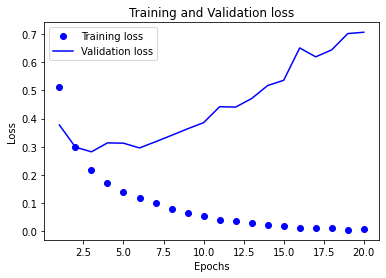

In [10]:
loss_values = History.history['loss']
val_loss_values = History.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Prevent Overfitting
Stop training after 4 epochs

In [11]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4362 - accuracy: 0.8269
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2506 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1960 - accuracy: 0.9294
Epoch 4/4
49/49 [==============================] - 0s 6ms/step - loss: 0.1639 - accuracy: 0.9414


In [13]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 710us/step - loss: 0.2972 - accuracy: 0.8842


[0.297227680683136, 0.8841999769210815]

In [23]:
model.predict(x_test)

array([[0.24121529],
       [0.99982786],
       [0.88118947],
       ...,
       [0.10203016],
       [0.07681417],
       [0.4932132 ]], dtype=float32)